#Тестовое задание

**Описание** \
Имеются данные о штатной численности сотрудников предприятия, имеющего офисы по всей России. В данных присутствуют ошибки, мешающие обработке информации и подготовке отчета. Требуется провести предобработку данных и ответить на поставленные задачи.

In [72]:
#Загружаем библиотеки, с которыми будем работать и выводим на экран версию каждой библиотеки
import xlrd
print('xlrd version', xlrd.__version__)
import pandas as pd
print('pandas version', pd.__version__)
import numpy
print('numpy version', numpy.__version__)
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import MaxNLocator

xlrd version 2.0.1
pandas version 1.5.3
numpy version 1.23.5


In [73]:
#Выгружаем данные из файлов excel
cities = pd.read_excel('/content/Города.xlsx') # В скобках указан непосредственный путь в файлу на Google Colab.
quantity = pd.read_excel('/content/ШЧ.xlsx') # Для корректной работы кода на других компьютерах следует указать актуальный путь файлов.

##1. Предобработка таблицы:

###1.1. Поиск ошибок
В таблице есть ошибки данных (некорректный для поля тип данных, дубликат и пр.), укажите, как их обнаружили, и что предприняли для их устранения

In [74]:
print(cities.info()) #Выводим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Федеральный округ  493 non-null    object
 1   Регион             493 non-null    object
 2   Город              493 non-null    object
dtypes: object(3)
memory usage: 11.7+ KB
None


В таблице с городами отсутствуют пропуски в значениях и все столбцы имеют формат object, что является нормой для указанной таблицы. Проверим наличие дубликатов.

In [75]:
print(cities.loc[cities['Город'].duplicated()])

    Федеральный округ             Регион         Город
294               УФО  Свердловская обл.     Свободный
359               ЦФО          г. Москва        Троицк
372               ЦФО       Курская обл.  Железногорск


Данные дубликаты обусловлены наличием городов с одним названием в разных регионах. По информации, полученной у руководства в данных городах не представлены офисы, поэтому дубликаты нужно удалить, чтобы в дальнейшем, при объединении таблиц не задваивались данные.

In [76]:
cities = cities.drop_duplicates(subset = ['Город'], keep = 'first') #Удалим строки с дубликатами в столбце город
print(cities.loc[cities['Город'].duplicated()])

Empty DataFrame
Columns: [Федеральный округ, Регион, Город]
Index: []


Дубликаты успешно удалены. Это поможет предотвратить некорректное отображение данных.

In [77]:
print(quantity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Период           4995 non-null   int64  
 1   ID должности     4995 non-null   object 
 2   Табельный номер  4883 non-null   float64
 3   Город            4880 non-null   object 
 4   Должность        4856 non-null   object 
 5   ФИО              4883 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 234.3+ KB
None


В столбцах видны пропуски, их следует заполнить. Кроме того, некоторые столбцы имеют неверный тип данных. Для начала взглянем на датасет.

In [78]:
print(quantity.head())

   Период ID должности  Табельный номер          Город  \
0   44927         1000           2201.0    Новоуральск   
1   44927         1001           2202.0     Оленегорск   
2   44927         1002           2203.0  Североуральск   
3   44927         1003           2204.0        Жуковка   
4   44927         1004           2205.0        Воркута   

                                        Должность         ФИО  
0  главный клиентский менеджер розничного бизнеса  Корнеев З.  
1                 управляющий операционным офисом  Сергеев Е.  
2                             руководитель группы  Корнеев Д.  
3                                   офис-менеджер   Петров Н.  
4                  эксперт по работе с партнерами  Корнеев Я.  


Начнем с даты, видно, что она указана в количестве дней, прошедших с 1 января 1900 года. Требуется преобразовать дату в удобный для работы формат

In [79]:
pd.options.mode.chained_assignment = None #Предотвращает появления предупреждения об ошибке
#Цикл для преобразования значений столбца в нужный формат
for value in range(len(quantity['Период'])):
  quantity['Период'][value] = xlrd.xldate_as_datetime(quantity['Период'][value], 0)
quantity['Период'] = pd.to_datetime(quantity['Период'], format = '%Y-%m-%d %H:%M:%S')
print(quantity['Период'].head())

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: Период, dtype: datetime64[ns]


Далее требуется перевести столбец 'ID должности' в целочисленный формат. \
*В ходе выполнения операции высвечивалась ошибка, не позволяющая переводить столбец в нужный формат. Для выполнения операции столбец был предобработан*

In [80]:
print(sorted(quantity['ID должности'].astype('str').unique())) #Сортируем значения в порядке возрастания

['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1013,Нягань', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1118', '1119', '1120', '1121', '1122', 

In [81]:
#Преобразовываем столбец в формат int
quantity['ID должности'] = \
(
    quantity['ID должности'] #Выбираем нужный столбец
    .astype('str')           #Переводим в формат строки
    .str.split(',')          #Разделяем строку по запятой
    .str[0]                  #Выбираем первый элемент
    .astype('int')           #Переводим в целочисленный формат
 )
print(quantity['ID должности'].head())

0    1000
1    1001
2    1002
3    1003
4    1004
Name: ID должности, dtype: int64


In [82]:
#Заполняем пробелы и переводим столбец в целочисленный формат
quantity['Табельный номер'] = quantity['Табельный номер'].fillna(0).astype('int')

Еще раз просматриваем информацию о датасете, чтобы убедиться, что предобработка прошла успешно.

In [83]:
print(quantity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Период           4995 non-null   datetime64[ns]
 1   ID должности     4995 non-null   int64         
 2   Табельный номер  4995 non-null   int64         
 3   Город            4880 non-null   object        
 4   Должность        4856 non-null   object        
 5   ФИО              4883 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 234.3+ KB
None


In [84]:
duplicates = quantity.loc[quantity['Табельный номер'] !=0, ['Период', 'ID должности']] #Поиск дубликатов и просмотр их суммы
print(duplicates.duplicated().sum())

1


Обнаружен 1 дубликат среди должностей. Предполагая, что каждую должность может занимать 1 человек стоит удалить данный дубликат. Но для начала стоит взглянуть на него.

In [85]:
duplicates.loc[duplicates.duplicated()]

,Период,ID должности
2714,2023-03-01,1715


In [86]:
print(quantity.loc[quantity['ID должности']==1715]) #Используя ID должности находим должность и информацию, связанную с ней

         Период  ID должности  Табельный номер        Город  \
715  2023-01-01          1715             2916      Светлый   
1714 2023-02-01          1715             2916      Светлый   
2713 2023-03-01          1715             2916      Светлый   
2714 2023-03-01          1715             2917  Североморск   
3712 2023-04-01          1715             2916      Светлый   
4711 2023-05-01          1715             2916      Светлый   

               Должность        ФИО  
715     начальник отдела  Бобров С.  
1714    начальник отдела  Бобров С.  
2713    начальник отдела  Бобров С.  
2714  ведущий специалист  Бобров Я.  
3712    начальник отдела  Бобров С.  
4711                 NaN  Бобров С.  


Исходя из того, что дубликат находится в другом регионе, можно сделать вывод, что это ошибка выгрузки. И данное значение нужно удалить.

In [87]:
quantity = quantity.loc[quantity.index != 2714] #Убираем лишнюю строку, используя номер индекса
print(quantity.loc[quantity['ID должности']==1715]) #Еще раз просматриваем данные на наличие дубликата

         Период  ID должности  Табельный номер    Город         Должность  \
715  2023-01-01          1715             2916  Светлый  начальник отдела   
1714 2023-02-01          1715             2916  Светлый  начальник отдела   
2713 2023-03-01          1715             2916  Светлый  начальник отдела   
3712 2023-04-01          1715             2916  Светлый  начальник отдела   
4711 2023-05-01          1715             2916  Светлый               NaN   

            ФИО  
715   Бобров С.  
1714  Бобров С.  
2713  Бобров С.  
3712  Бобров С.  
4711  Бобров С.  


Дубликат успешно удален. Далее переходим к заполнению пропусков в таблице.

###1.2. Заполнение пропусков
Часть данных по некоторым должностям была утеряна, но известно, что ID имеет уникальную должность и локацию, и не меняется из периода в период, восстановите недостающие данные

Просмотрим датасет, прежде чем заполнять пропуски, мы заполняем только города и должности, так как отсутствие табельного номера и ФИО означает, что должность вакантна.

In [88]:
quantity.loc[quantity['Город'].isna()==True].head()

,Период,ID должности,Табельный номер,Город,Должность,ФИО
70,2023-01-01,1070,0,NaN,NaN,NaN
99,2023-01-01,1099,0,NaN,NaN,NaN
104,2023-01-01,1104,0,NaN,NaN,NaN
118,2023-01-01,1118,0,NaN,NaN,NaN
145,2023-01-01,1145,0,NaN,NaN,NaN


In [89]:
#Цикл для заполнения пропусков по ID должности
for value in quantity['ID должности'].unique():
      quantity.loc[quantity['ID должности'] == value, 'Город'] = quantity.loc[(quantity['ID должности'] == value), 'Город'].dropna().unique()[0]

In [90]:
for value in quantity['ID должности'].unique():
      quantity.loc[quantity['ID должности'] == value, 'Должность'] = quantity.loc[(quantity['ID должности'] == value), 'Должность'].dropna().unique()[0]

Проверим наличие пропусков в столбцах.

In [91]:
quantity.isna().sum()

Период               0
ID должности         0
Табельный номер      0
Город                0
Должность            0
ФИО                112
dtype: int64

##2. Построить сводную таблицу с разбивкой по месяцам

Добавим в датафрейм номера месяцев

In [92]:
quantity['Месяц'] = quantity['Период'].dt.month
print(quantity['Месяц'].head())

0    1
1    1
2    1
3    1
4    1
Name: Месяц, dtype: int64


In [93]:
#Строим сводную таблицу
pivot = pd.pivot_table(data = quantity, index = 'Месяц', values = ['ID должности', 'Табельный номер'], aggfunc=['nunique'])
pivot.columns= (['ID должности',	'Табельный номер'])                                    #Убираем мультизаголовок
pivot['Свободных должностей'] = pivot['ID должности'] - pivot['Табельный номер']         #Ищем количество свободных должностей
pivot['Доля свободных должностей'] = pivot['Свободных должностей']/pivot['ID должности'] #Расчет доли свободных должностей
print(pivot[['ID должности', 'Свободных должностей', 'Доля свободных должностей']])

       ID должности  Свободных должностей  Доля свободных должностей
Месяц                                                               
1               999                    12                   0.012012
2               999                    23                   0.023023
3               998                    23                   0.023046
4               999                    28                   0.028028
5               999                    21                   0.021021


##3. Работа по дополнению предобработанной таблицы

###3.1. Добавить Федеральные округа и Регионы

In [94]:
quantity = quantity.merge(right=cities, on= 'Город', how= 'inner') #Объединяем таблицы по столбцу Город
print(quantity.head())

      Период  ID должности  Табельный номер        Город  \
0 2023-01-01          1000             2201  Новоуральск   
1 2023-01-01          1150             2351  Новоуральск   
2 2023-01-01          1645             2846  Новоуральск   
3 2023-02-01          1000             2201  Новоуральск   
4 2023-02-01          1150             2351  Новоуральск   

                                        Должность         ФИО  Месяц  \
0  главный клиентский менеджер розничного бизнеса  Корнеев З.      1   
1                             клиентский менеджер   Петров М.      1   
2         директор по работе с крупными клиентами   Петров К.      1   
3  главный клиентский менеджер розничного бизнеса  Корнеев З.      2   
4                             клиентский менеджер   Петров М.      2   

  Федеральный округ             Регион  
0               УФО  Свердловская обл.  
1               УФО  Свердловская обл.  
2               УФО  Свердловская обл.  
3               УФО  Свердловская обл.  
4

###3.2. Добавить количество месяцев поиска сотрудника по должности накопительно по каждому месяцу

Так как данный столбец нам не понадобится для дальнейшего анализа было принято решение по созданию отдельной таблицы с недостающими сотрудниками. \
Прежде чем приступить к добавлению нужного столбца следует добавить вспомогательный столбец.

In [95]:
#Сортировка данных по месяцам для дальнейшей работы
no_people = quantity.loc[quantity['Табельный номер'] == 0].sort_values(by = 'Месяц')
no_people['Вспомогательный столбец'] = 1 #Вспомогательный столбец позволит расчитать количество месяцев накопительно

#Цикл для расчета количества месяцев поиска накопительно
for value in no_people['ID должности'].unique():
  no_people.loc[no_people['ID должности'] == value, 'Месяцев поиска'] = numpy.cumsum(no_people.loc[no_people['ID должности'] == value, 'Вспомогательный столбец'])
print(no_people.head())

         Период  ID должности  Табельный номер      Город  \
2455 2023-01-01          1209                0       Орск   
1237 2023-01-01          1280                0  Алакуртти   
1525 2023-01-01          1104                0        Бор   
1625 2023-01-01          1118                0  Полевской   
1885 2023-01-01          1145                0  Магдагачи   

                                          Должность  ФИО  Месяц  \
2455  директор по работе с состоятельными клиентами  NaN      1   
1237                       заместитель управляющего  NaN      1   
1525                             младший специалист  NaN      1   
1625                           управляющий директор  NaN      1   
1885        управляющий директор - начальник отдела  NaN      1   

     Федеральный округ              Регион  Вспомогательный столбец  \
2455               ПФО   Оренбургская обл.                        1   
1237              СЗФО     Мурманская обл.                        1   
1525             

##4. Дополнительные вопросы по пункту 3

###4.1. В каких городах наблюдается нехватка кадров на последний месяц?

In [96]:
pivot_no_people = pd.pivot_table(data = no_people.loc[no_people['Месяц'] == 5], index = 'Город', values = 'Месяцев поиска', aggfunc = 'sum').sort_values(by = 'Месяцев поиска', ascending=False)
print(pivot_no_people.head())

                 Месяцев поиска
Город                          
Биробиджан                  5.0
Городец                     5.0
Анжеро-Судженск             4.0
Когалым                     4.0
Сосновый Бор                4.0


Биробиджан и Городец имеют самую большую сумму месяцев поиска новых сотрудников.

###4.2. В каком регионе работает наибольшее количество сотрудников на последний месяц?

In [97]:
people = quantity.loc[quantity['Табельный номер'] != 0] #Убираем пустые должности
pivot_people = pd.pivot_table(data = people.loc[people['Месяц'] == 5], index = 'Регион', values = 'Табельный номер', \
                              aggfunc = 'count').sort_values(by = 'Табельный номер', ascending=False)
print(pivot_people.head())

                                          Табельный номер
Регион                                                   
Московская обл.                                        56
Свердловская обл.                                      50
Ханты-Мансийский Автономный округ - Югра               36
Нижегородская обл.                                     34
Мурманская обл.                                        33


Московская область имеет самое большое количество сотрудников.

In [98]:
people = \
(
    quantity[['Должность','Месяц', 'ID должности','Табельный номер']] #Выбираем необходимые столбцы
    .groupby(['Должность', 'Месяц'])                                  #Группируем данные
    .nunique()                                                        #Расчитываем количество уникальных значений
    .reset_index()                                                    #Сбрасываем индекс
)
people['Свободных должностей'] = people['ID должности']-people['Табельный номер'] #Считаем количество свободных должностей
people['Доля свободных должностей'] = people['Свободных должностей']/people['ID должности'] #Расчет доли
people.sort_values(by = 'Доля свободных должностей', ascending = False) #Сортировка данных по убыванию
print(people.head())

            Должность  Месяц  ID должности  Табельный номер  \
0  ведущий специалист      1            45               45   
1  ведущий специалист      2            45               45   
2  ведущий специалист      3            44               44   
3  ведущий специалист      4            45               45   
4  ведущий специалист      5            45               45   

   Свободных должностей  Доля свободных должностей  
0                     0                        0.0  
1                     0                        0.0  
2                     0                        0.0  
3                     0                        0.0  
4                     0                        0.0  


В последние 2 месяца наибольшая текучесть наблюдалась у должности под наименованием *управляющий операционным офисом*
Отрицательная текучесть означает, что на 1 должности работает несколько человек

##5. Визуализация

###5.1. Количество действующих сотрудников по Федеральным округам

###5.2. Количество свободных должностей по регионам

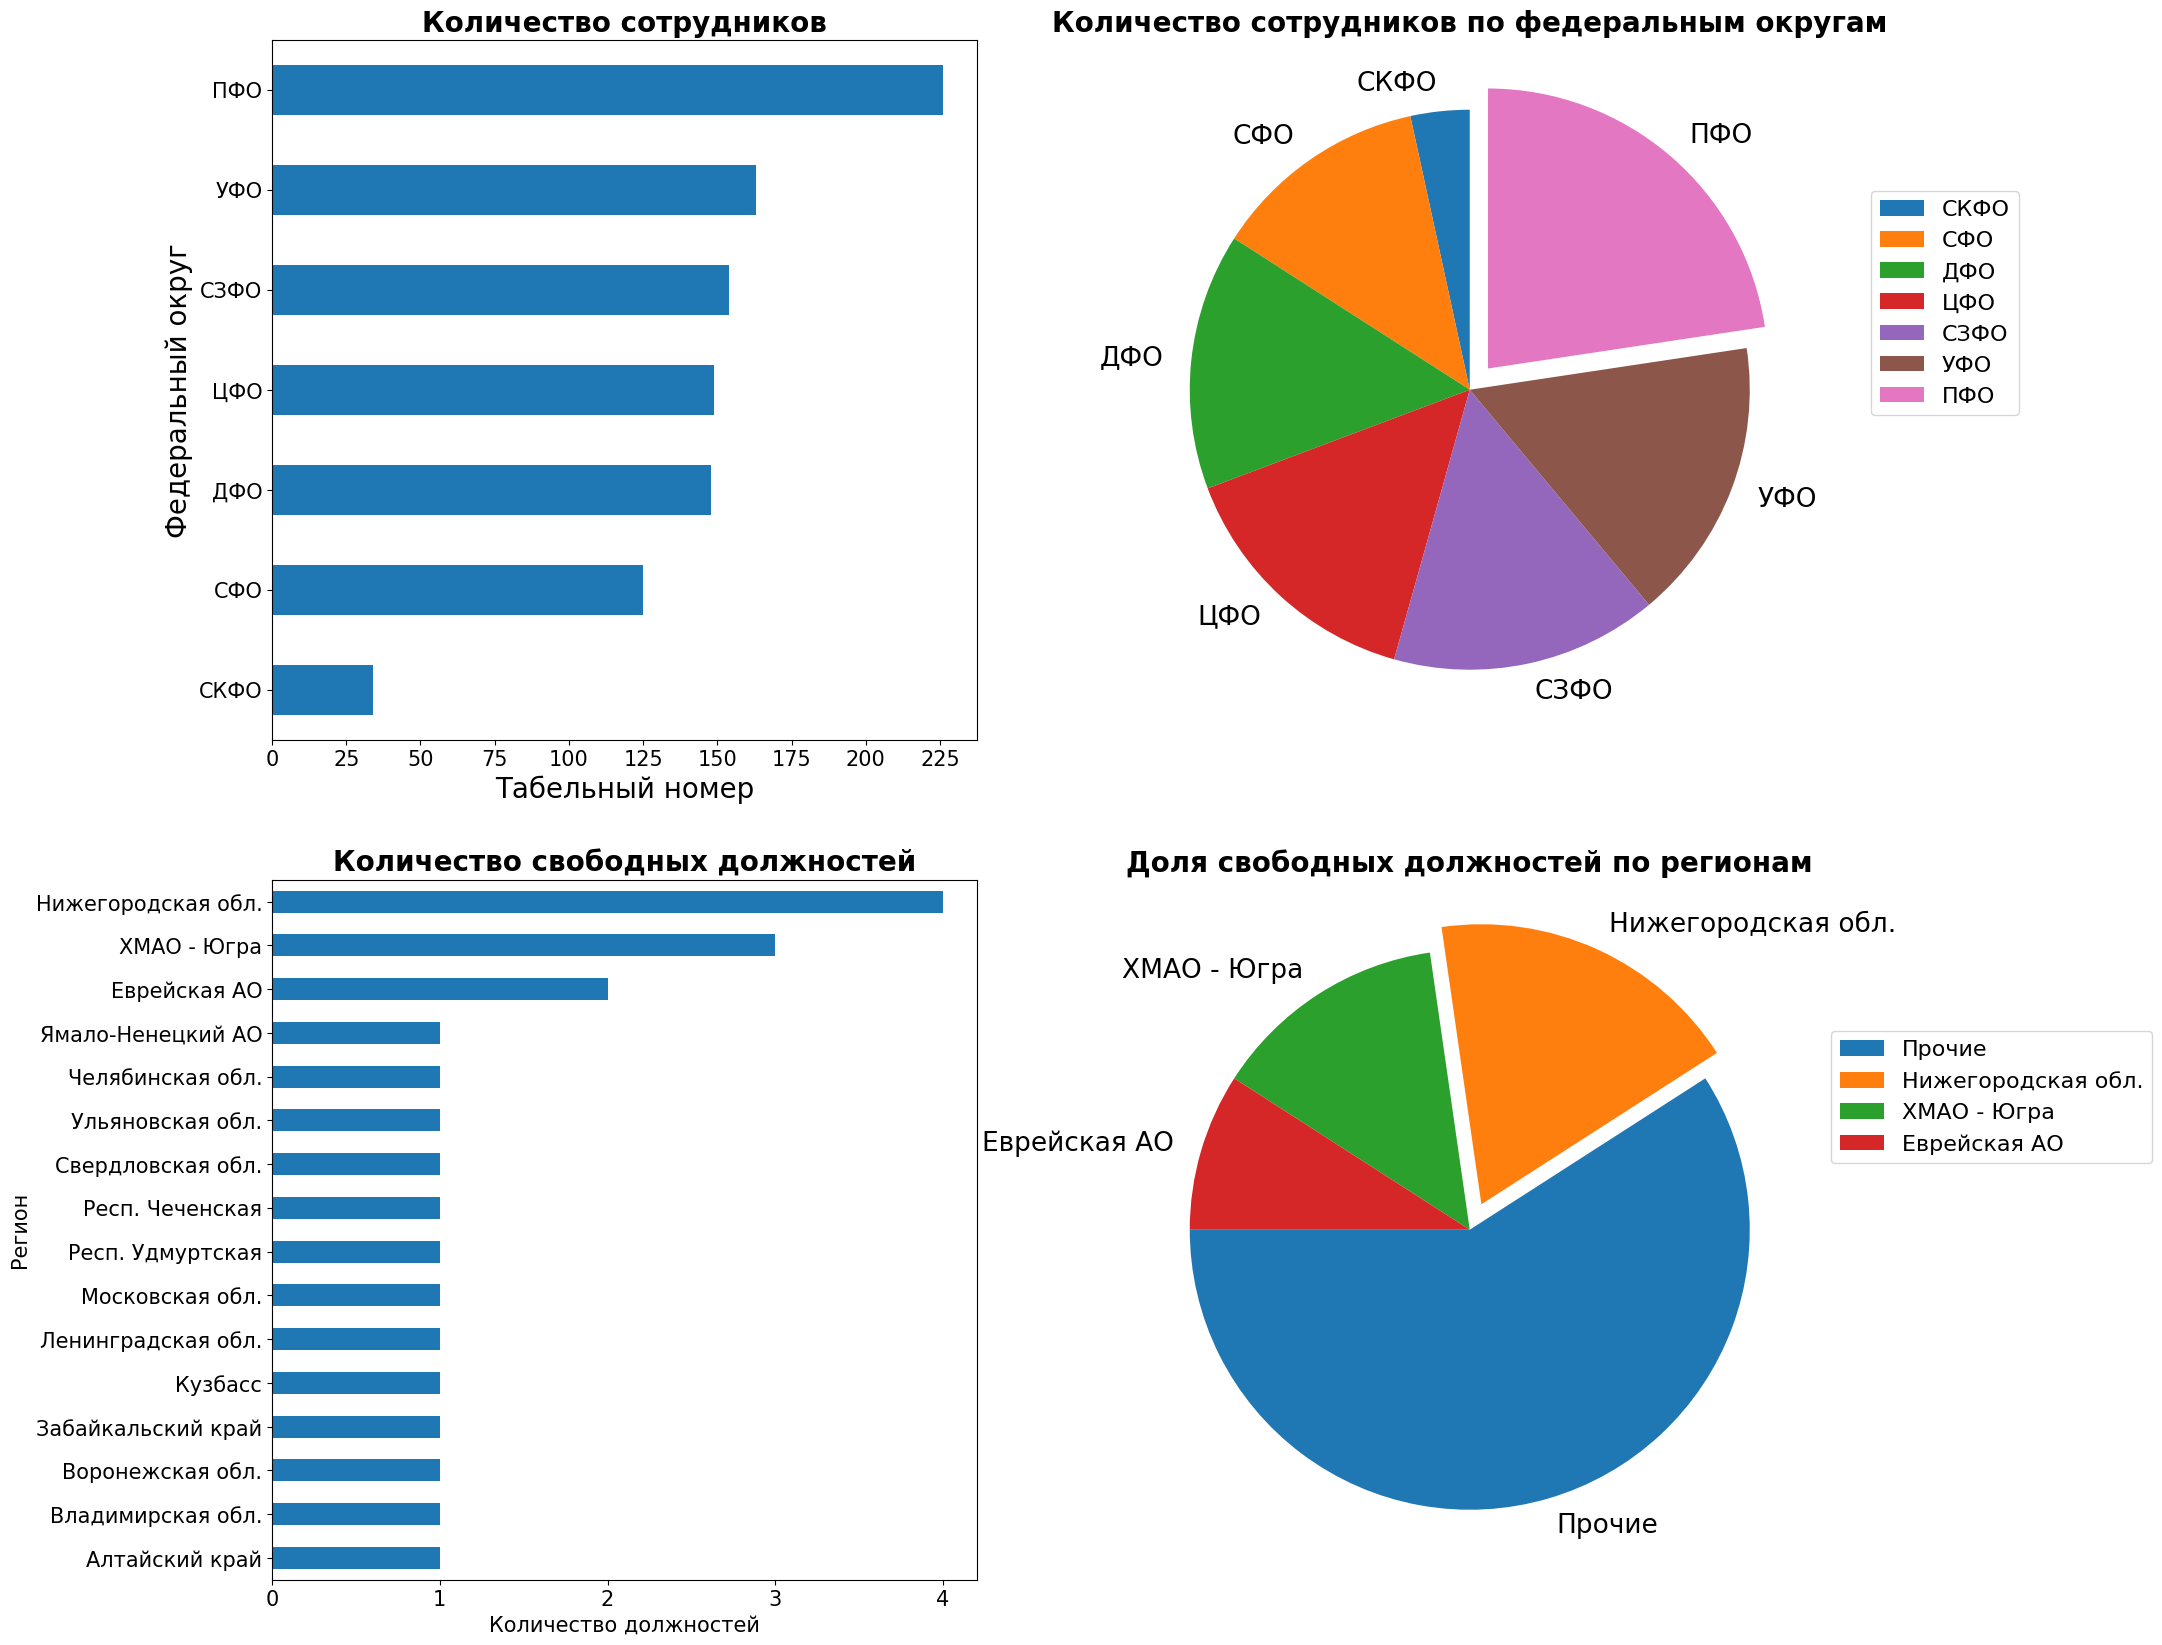

In [157]:
ax1 = plt.subplot(2, 2, 1) #Определяем количество строк и столбцов области и расположение конкретного графика
font_size = 20             #Опледеляем размер графика
#Строим сводную таблицу для графика
pivot_region = \
(
    pd.pivot_table(data = quantity.loc[quantity['Месяц']==5], index = 'Федеральный округ', values = 'Табельный номер', aggfunc = 'count')
    .sort_values(by = 'Табельный номер', ascending=True) #Сортируем данные в порядке возрастания, чтобы на графике они шли по убыванию (график строится "снизу")
)
ax = pivot_region.plot(kind = 'barh', figsize = (20,20), legend = False, fontsize = font_size, ylabel = 'Федеральный округ', ax = ax1); #Строим график

ax.xaxis.set_major_locator(MaxNLocator(integer=True))                #Настраиваем значения осей так, чтобы выводились только целые числа
ax.tick_params(labelsize=15)                                         #Настраиваем размер подписей
ax.set_xlabel('Табельный номер', fontsize=font_size)                 #Добавляем подписи осей и их размер
ax.set_ylabel('Федеральный округ', fontsize=font_size)
plt.title('Количество сотрудников', fontsize=20, fontweight='bold')  #Добавляем подпись к графику

#Строим круговую диаграмму
explode = [0, 0, 0, 0, 0, 0, 0.1]                                    #Выделяем долю, которая больше всего интересует в задании
ax2 = plt.subplot(2, 2, 2)
ax2.pie(pivot_region['Табельный номер'], labels = pivot_region.index, explode = explode, startangle=90, textprops={'fontsize': 19});
ax2.set_title('Количество сотрудников по федеральным округам', fontsize=20, fontweight='bold') #Добавляем и настраиваем заголовок и подписи
ax2.tick_params(labelsize=15)
ax2.legend(pivot_region.index,                                                                 #Добавляем и настраиваем легенду
          bbox_to_anchor=(1, 0, 0.3, 0.8),
          prop={'size':16});

#Строим второй график
ax3 = plt.subplot(2, 2, 3)
no_people_region = \
(
    pd.pivot_table(data = no_people.loc[no_people['Месяц'] == 5], index = 'Регион', values = 'Должность', aggfunc = 'nunique')
    .sort_values(by = 'Должность', ascending=True)
    .rename(index = {'Ханты-Мансийский Автономный округ - Югра':'ХМАО - Югра', 'Кемеровская область - Кузбасс': 'Кузбасс'})
)
ax3 = no_people_region.plot(kind = 'barh', figsize = (20,20), legend = False, fontsize = font_size, ylabel = 'Регион', \
                           title = 'Количество свободных должностей', ax = ax3)

ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
ax3.tick_params(labelsize=15)
ax3.set_xlabel('Количество должностей', fontsize=15)
ax3.set_ylabel('Регион', fontsize=15)
plt.title('Количество свободных должностей', fontsize=20, fontweight='bold')

#Подготовка сводной таблицы для построения второй круговой диаграммы
no_people_region.loc[len(no_people_region.index)] = [0]             #Добавляем новую строку для подсчета суммы
no_people_region = no_people_region.rename(index = {16: 'Прочие'})  #Переименовываем индекс

for value in range(len(no_people_region['Должность'])):             #Цикл для сложения значений меньше 2
  if no_people_region['Должность'][value] < 2:
    no_people_region['Должность']['Прочие'] += no_people_region['Должность'][value]
no_people_region = \
(
    no_people_region.loc[no_people_region['Должность'] > 1]         #Оставляем строки, значения которых больше 1 и сортируем в порядке убывания
    .sort_values(by = 'Должность', ascending = False)
)

#Строим вторую круговую диаграмму
explode = [0, 0.1, 0, 0]
ax4 = plt.subplot(2, 2, 4)
ax4.pie(no_people_region['Должность'], labels = no_people_region.index, explode = explode, startangle=180, textprops={'fontsize': 19});
ax4.set_title('Доля свободных должностей по регионам', fontsize=20, fontweight='bold')
ax4.tick_params(labelsize=15)
ax4.legend(no_people_region.index,
          bbox_to_anchor=(1, 0, 0.3, 0.8),
          prop={'size':16});

На последний месяц наибольшее количество сотрудников имеется в ПФО

В последнем месяце наибольшее количество свободных должностей было в Нижегородской области.